<a href="https://colab.research.google.com/github/KomaliReddyVavilala/StockPrediction/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data.csv


In [ ]:
data = pd.read_csv('stock_data.csv')
data.head()

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  365 non-null    object 
 1   Stock_1     365 non-null    float64
 2   Stock_2     365 non-null    float64
 3   Stock_3     365 non-null    float64
 4   Stock_4     365 non-null    float64
 5   Stock_5     365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5'], dtype='object')


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data["Stock_1"]=pd.to_numeric(data.Stock_1,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  365 non-null    object 
 1   Stock_1     365 non-null    float64
 2   Stock_2     365 non-null    float64
 3   Stock_3     365 non-null    float64
 4   Stock_4     365 non-null    float64
 5   Stock_5     365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(365, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,-1): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[0],0)) #adding the batch_size axis
X_train.shape

(0, 0, 0)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# ... previous code ...

X_train = []
y_train = []

for i in range(60, len(trainData)):  # Correct the loop range
    X_train.append(trainData[i - 60:i, 0])
    y_train.append(trainData[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

if X_train.size == 0 or y_train.size == 0:
    print("Error: Training data is empty. Check the loop or input data.")
else:
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape with valid data
    hist = model.fit(X_train, y_train, epochs=10, batch_size=20, verbose=2)

Epoch 1/10
16/16 - 8s - 525ms/step - loss: 0.0869
Epoch 2/10
16/16 - 2s - 154ms/step - loss: 0.0155
Epoch 3/10
16/16 - 3s - 212ms/step - loss: 0.0166
Epoch 4/10
16/16 - 4s - 265ms/step - loss: 0.0140
Epoch 5/10
16/16 - 3s - 179ms/step - loss: 0.0140
Epoch 6/10
16/16 - 2s - 149ms/step - loss: 0.0114
Epoch 7/10
16/16 - 3s - 172ms/step - loss: 0.0147
Epoch 8/10
16/16 - 5s - 286ms/step - loss: 0.0120
Epoch 9/10
16/16 - 2s - 139ms/step - loss: 0.0107
Epoch 10/10
16/16 - 3s - 160ms/step - loss: 0.0128


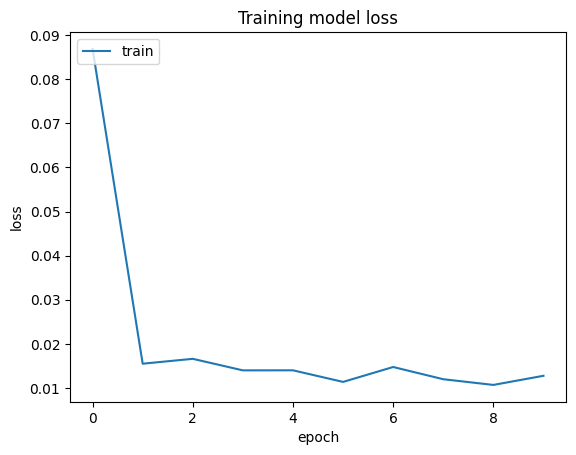

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('stock_data.csv')
testData["Stock_1"]=pd.to_numeric(testData.Stock_1,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(305, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


array([[0.42337424],
       [0.4223756 ],
       [0.42208737],
       [0.42282233],
       [0.42505762],
       [0.42886624],
       [0.43400154],
       [0.44029856],
       [0.44774383],
       [0.45644495],
       [0.46656442],
       [0.478202  ],
       [0.49159634],
       [0.5069042 ],
       [0.52409136],
       [0.5429189 ],
       [0.56297517],
       [0.5834536 ],
       [0.60362613],
       [0.62282187],
       [0.6408149 ],
       [0.65755206],
       [0.673106  ],
       [0.68757135],
       [0.7008585 ],
       [0.7130361 ],
       [0.7245625 ],
       [0.73586994],
       [0.7471717 ],
       [0.7583812 ],
       [0.76883537],
       [0.7777807 ],
       [0.78465116],
       [0.7893605 ],
       [0.7922676 ],
       [0.793778  ],
       [0.7942034 ],
       [0.7940445 ],
       [0.79371727],
       [0.7934091 ],
       [0.79348916],
       [0.7944827 ],
       [0.7967835 ],
       [0.800438  ],
       [0.8048079 ],
       [0.80926967],
       [0.81308824],
       [0.815

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

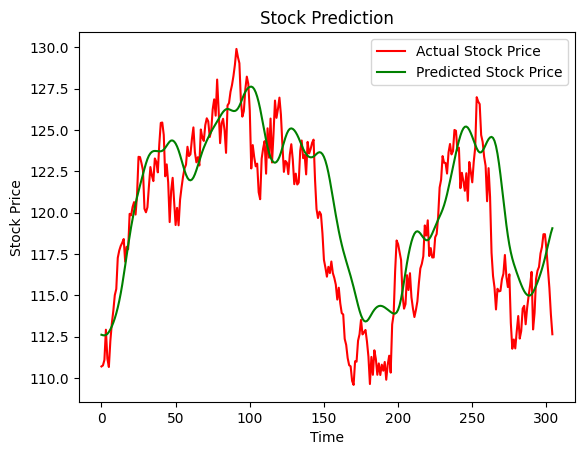

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()